In [1]:
# 
import torch
#torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(123) # 设置随机数种子为33
%matplotlib widget 

In [2]:
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model_LF = KAN(width=[2,7,1], grid=10, k=7, seed=0, device=device)

In [3]:
# 定义数据集函数 f(x,y) = exp(sin(pi*x) + y^2)
#f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
f_L = lambda x: 0.5*(x[:, [1]]-1.275*x[:, [0]]**2/(np.pi**2)+5*x[:, [0]]/np.pi-6)**2+0.5*(10+torch.Tensor(1,1).uniform_(0,1))*(1-1/(8*np.pi))*np.cos(x[:, [0]])+10 + torch.Tensor(1,1).uniform_(0,1)
f_H = lambda x: (x[:, [1]]-1.275*x[:, [0]]**2/(np.pi**2)+5*x[:, [0]]/np.pi-6)**2+(10-5/(4*np.pi))*np.cos(x[:, [0]])+10

# branin
# y_H = (x2-1.275*x1**2/(np.pi**2)+5*x1/np.pi-6)**2+(10-5/(4*np.pi))*np.cos(x1)+10
# y_L = 0.5*(x2-1.275*x1**2/(np.pi**2)+5*x1/np.pi-6)**2+0.5*(10+np.random.uniform(0, 1))*(1-1/(8*np.pi))*np.cos(x1)+10+np.random.uniform(0, 1)

# 使用 create_dataset 函数创建数据集
# 数据集包含两个自变量（n_var=2）
# 数据集会根据设备 device 进行处理
dataset_LF = create_dataset(f_L, n_var=2, device=device, train_num=200, test_num=200, ranges = [[-5,10],[-5,10]], normalize_input=True, normalize_label=True)

In [4]:
LF_train_sample = torch.cat((dataset_LF['train_input_true'],dataset_LF['train_label_true']),axis = 1)
LF_test_sample = torch.cat((dataset_LF['test_input_true'],dataset_LF['test_label_true']),axis = 1)
np.savetxt(f'D:/桌面/KAN_hmx/KAN/model_ckpt/branin_HF/branin_HF_samples/branin_LF_train_200.csv',LF_train_sample.cpu().numpy(),delimiter=',')


train loss: 5.35e-02 | test loss: 4.26e-02 | reg: 9.84e+00 : 100%|██| 20/20 [00:12<00:00,  1.64it/s]


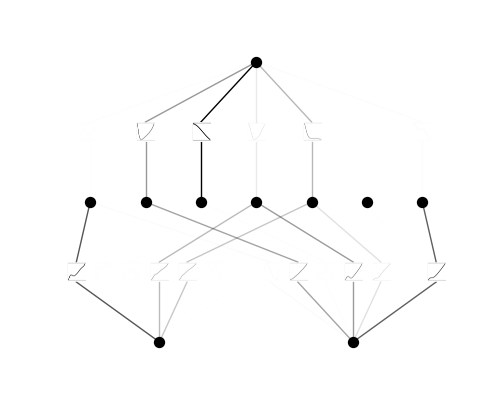

In [4]:
#model_LF.train(dataset_LF, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10., device=device, lr=0.1)
model_LF.train(dataset_LF, opt="LBFGS", steps=20, device=device, lr=0.1, lamb=0.01, lamb_entropy=2.)
model_LF.plot()

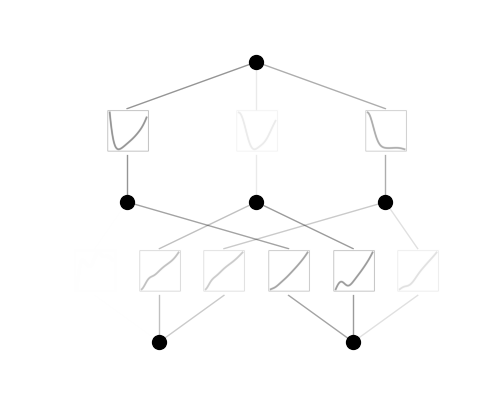

In [5]:
# 修剪KAN模型，并将修剪后的模型重新赋值给原来的模型变量
model_LF = model_LF.prune()
# 使用修剪后的模型对训练输入数据进行预测
model_LF(dataset_LF['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model_LF.plot()

train loss: 1.62e-03 | test loss: 3.88e-03 | reg: 5.01e+00 : 100%|██| 50/50 [00:18<00:00,  2.65it/s]


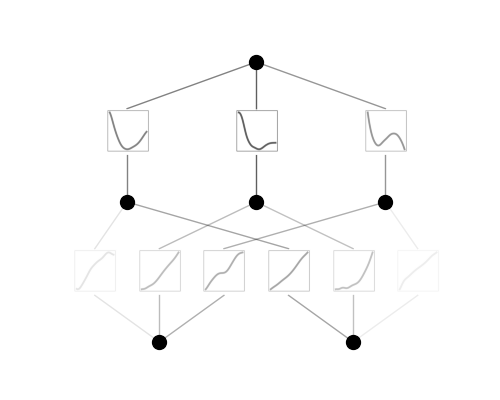

No such comm: 17af5eada1d74e9285c34884f2434ac8
No such comm: 17af5eada1d74e9285c34884f2434ac8
No such comm: 17af5eada1d74e9285c34884f2434ac8
No such comm: 17af5eada1d74e9285c34884f2434ac8
No such comm: b3953a5d26974bd4ae2616e817df9b23
No such comm: b3953a5d26974bd4ae2616e817df9b23
No such comm: b3953a5d26974bd4ae2616e817df9b23
No such comm: b3953a5d26974bd4ae2616e817df9b23
No such comm: 5e02abd97df649b08afeee6b6ff7f7cf
No such comm: 5e02abd97df649b08afeee6b6ff7f7cf
No such comm: 5e02abd97df649b08afeee6b6ff7f7cf
No such comm: 5e02abd97df649b08afeee6b6ff7f7cf
No such comm: 97b88c2b2b6c43b0be14a6e507a528f5
No such comm: 97b88c2b2b6c43b0be14a6e507a528f5
No such comm: 97b88c2b2b6c43b0be14a6e507a528f5
No such comm: 97b88c2b2b6c43b0be14a6e507a528f5


In [6]:
# 继续对模型进行训练
# 使用 LBFGS 优化器
# 进行 50 步训练
# 在给定的设备上进行训练
model_LF.train(dataset_LF, opt="LBFGS", steps=50,device=device, lr=0.1)
model_LF.plot()

In [7]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "auto"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model_LF.fix_symbolic(0, 0, 0, 'sin') # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model_LF.fix_symbolic(0, 1, 0, 'x^2') # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model_LF.fix_symbolic(1, 0, 0, 'exp') # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model_LF.auto_symbolic(lib=lib)

fixing (0,0,0) with tanh, r2=0.9952102899551392
fixing (0,0,1) with sin, r2=0.9990482330322266
fixing (0,0,2) with sqrt, r2=0.973991870880127
fixing (0,1,0) with tanh, r2=0.999007523059845
fixing (0,1,1) with tanh, r2=0.9991009831428528
fixing (0,1,2) with sqrt, r2=0.994589626789093
fixing (1,0,0) with x^2, r2=0.9591933488845825
fixing (1,1,0) with x^2, r2=0.9739785194396973
fixing (1,2,0) with x^4, r2=0.28164511919021606


train loss: 2.32e-02 | test loss: 2.74e-02 | reg: 6.95e+00 : 100%|█| 100/100 [00:18<00:00,  5.38it/s


25.91*(sqrt(1 - 0.79*x_1) - 0.18*sqrt(x_2 + 0.46) - 0.45)**4 + 0.4*(-0.01*sin(2.26*x_1 - 7.76) + tanh(2.7*x_2 - 2.83) - 0.44)**2 + 1.2*(-0.17*tanh(2.52*x_1 - 0.41) - tanh(1.25*x_2 - 1.01) - 0.45)**2 - 0.77


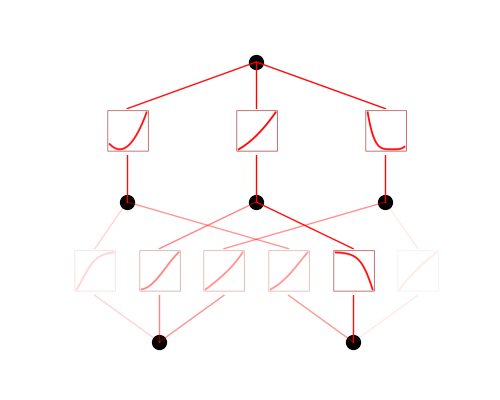

No such comm: 1afd7c692f714e519c5b7f540f5fee32
No such comm: 1afd7c692f714e519c5b7f540f5fee32
No such comm: 1afd7c692f714e519c5b7f540f5fee32
No such comm: 1afd7c692f714e519c5b7f540f5fee32


In [8]:
model_LF.train(dataset_LF, opt="LBFGS", steps=100, device=device,lr=0.001) # 继续对模型进行训练
print(model_LF.symbolic_formula()[0][0]) # 获取模型的符号化公式
model_LF.plot()

In [9]:
test_output = model_LF(dataset_LF['test_input'])*(dataset_LF['max_label']-dataset_LF['min_label'])+dataset_LF['min_label']
true_output=f_L(dataset_LF['test_input_true'].cpu().detach())

In [10]:
from math import sqrt
def NRMSE(y, ytest, r_num):
    nrmse = []
    for i in range(r_num):
        sum_1 = np.sum(np.power(y[:,i] - ytest[:,i], 2))
        sum_2 = np.sum(np.power(ytest[:,i], 2))
        nrmse.append(sqrt(sum_1 / sum_2))
    #print('nrmse='+str(nrmse))
    NRMSE = np.mean(nrmse)
    return NRMSE

In [11]:
nrmse = NRMSE(test_output.cpu().detach().numpy(),true_output.numpy(),1)
nrmse

0.1328113219265019

In [12]:
#model_LF.save_ckpt('beale_LF_model')
#torch.save(model_LF,'./model_ckpt/beale_LF_model.pth')

import dill #用于函数打包存储
#储存模型
with open('./model_ckpt/branin_LF_model.pkl', 'wb') as f:
   	dill.dump(model_LF, f)
# #读取模型
# with open(file_name, 'rb') as f:
# data_pack = pickle.load(f)


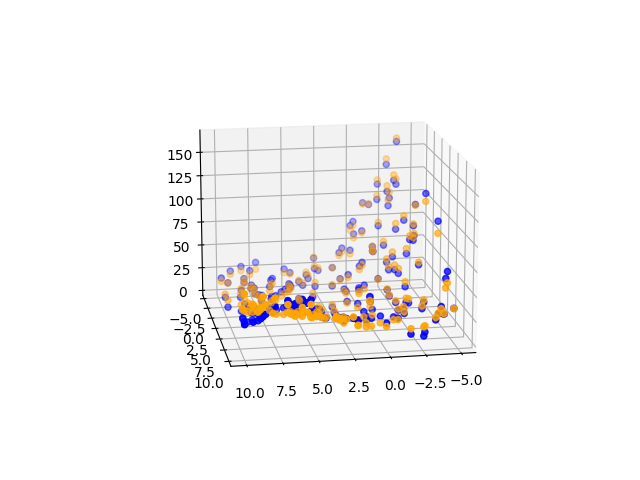

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset_LF['test_input_true'].cpu().detach().numpy()[:, 0], dataset_LF['test_input_true'].cpu().detach().numpy()[:, 1], test_output.cpu().detach().numpy(), color='orange')
ax.scatter(dataset_LF['test_input_true'].cpu().detach().numpy()[:, 0], dataset_LF['test_input_true'].cpu().detach().numpy()[:, 1], true_output, color='blue')
ax.view_init(elev=15,    # 仰角
             azim=80   # 方位角
            )
plt.show()

In [5]:
dataset_HF = create_dataset(f_H, n_var=2, device=device, train_num=20, test_num=100, ranges = [[-5,10],[-5,10]], normalize_input=True, normalize_label=True)
def normalize(data, max, min):
            return (data-min)/(max-min)
dataset_HF['max_input'] = dataset_LF['max_input']
dataset_HF['min_input'] = dataset_LF['min_input']

dataset_HF['max_label'] = dataset_LF['max_label']
dataset_HF['min_label'] = dataset_LF['min_label']

dataset_HF['train_input'] = normalize(dataset_HF['train_input_true'].to('cpu'), dataset_HF['max_input'], dataset_HF['min_input']).to(device)
dataset_HF['test_input'] = normalize(dataset_HF['test_input_true'].to('cpu'), dataset_HF['max_input'], dataset_HF['min_input']).to(device)

dataset_HF['train_label'] = normalize(dataset_HF['train_label_true'].to('cpu'), dataset_HF['max_label'], dataset_HF['min_label']).to(device)
dataset_HF['test_label'] = normalize(dataset_HF['test_label_true'].to('cpu'), dataset_HF['max_label'], dataset_HF['min_label']).to(device)

In [6]:
HF_train_sample = torch.cat((dataset_HF['train_input_true'],dataset_HF['train_label_true']),axis = 1)
HF_test_sample = torch.cat((dataset_HF['test_input_true'],dataset_HF['test_label_true']),axis = 1)
np.savetxt(f'D:/桌面/KAN_hmx/KAN/model_ckpt/branin_HF/branin_HF_samples/branin_HF_test_100.csv',HF_test_sample.cpu().numpy(),delimiter=',')


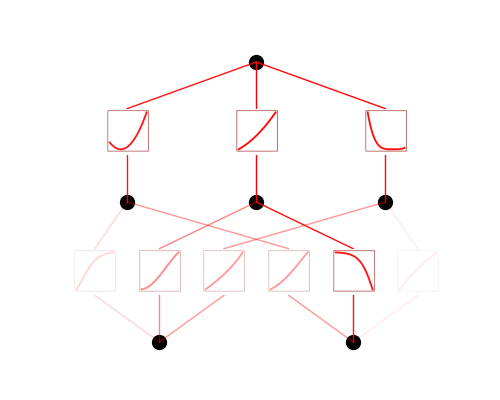

In [35]:
with open('./model_ckpt/branin_LF_model.pkl', 'rb') as f:
    model_LF = dill.load(f)
model_HF = KAN(width=model_LF.width, grid=100, k=7, seed=0, device=device)
model_HF.initialize_from_another_model(model_LF, dataset_HF['train_input'])
model_HF(dataset_LF['train_input'])
model_HF.plot()

In [17]:
print(model_HF.symbolic_formula()[0][0]) # 获取模型的符号化公式
print(model_LF.symbolic_formula()[0][0]) # 获取模型的符号化公式

25.91*(sqrt(1 - 0.79*x_1) - 0.18*sqrt(x_2 + 0.46) - 0.45)**4 + 0.4*(-0.01*sin(2.26*x_1 - 7.76) + tanh(2.7*x_2 - 2.83) - 0.44)**2 + 1.2*(-0.17*tanh(2.52*x_1 - 0.41) - tanh(1.25*x_2 - 1.01) - 0.45)**2 - 0.77
25.91*(sqrt(1 - 0.79*x_1) - 0.18*sqrt(x_2 + 0.46) - 0.45)**4 + 0.4*(-0.01*sin(2.26*x_1 - 7.76) + tanh(2.7*x_2 - 2.83) - 0.44)**2 + 1.2*(-0.17*tanh(2.52*x_1 - 0.41) - tanh(1.25*x_2 - 1.01) - 0.45)**2 - 0.77


train loss: 2.17e-02 | test loss: 7.90e-02 | reg: 7.86e+00 : 100%|█| 100/100 [00:42<00:00,  2.36it/s
train loss: 6.56e-02 | test loss: 4.44e-02 | reg: 9.43e+00 : 100%|█| 100/100 [00:59<00:00,  1.67it/s


17.59*(0.93*sqrt(1 - 0.78*x_1) + 0.45*sqrt(x_2 + 0.46) - 1)**4 + 0.4*(0.04*sin(2.28*x_1 - 7.73) + tanh(2.66*x_2 - 2.86) - 0.57)**2 + 1.58*(-0.78*tanh(2.72*x_1 - 0.1) - tanh(1.27*x_2 - 0.78) + 0.4)**2 - 0.92


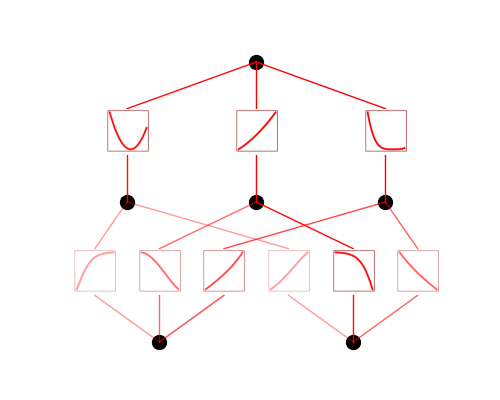

In [36]:
from audtorch.metrics.functional import pearsonr
# loss_fn = lambda x,y: torch.mean((x-y)**2)+0.5*torch.abs(pearsonr(model_HF(dataset_HF['train_input']).view(1,-1).to(device),model_LF(dataset_HF['train_input']).view(1,-1).to(device))[:,0][0]-pearsonr(model_HF(dataset_LF['train_input']).view(1,-1).to(device),dataset_LF['train_label'].view(1,-1).to(device))[:,0][0])
# model_HF.train(dataset_HF, opt="LBFGS", steps=500, device=device,lr=0.1,loss_fn=loss_fn)
loss_fn1 = lambda x,y: torch.mean((x-y)**2)+0.5*torch.abs(pearsonr(model_HF(dataset_HF['train_input']).view(1,-1).to(device),model_LF(dataset_HF['train_input']).view(1,-1).to(device))[:,0][0]-pearsonr(model_HF(dataset_LF['train_input']).view(1,-1).to(device),dataset_LF['train_label'].view(1,-1).to(device))[:,0][0])
loss_fn2 = lambda x,y: torch.mean((x-y)**2)+0.0*torch.abs(pearsonr(model_HF(dataset_HF['train_input']).view(1,-1).to(device),model_LF(dataset_HF['train_input']).view(1,-1).to(device))[:,0][0]-pearsonr(model_HF(dataset_LF['train_input']).view(1,-1).to(device),dataset_LF['train_label'].view(1,-1).to(device))[:,0][0])

model_HF.train(dataset_HF, opt="LBFGS", steps=100, device=device,lr=0.1,loss_fn=loss_fn2)
model_HF.train(dataset_HF, opt="LBFGS", steps=100, device=device,lr=0.1,loss_fn=loss_fn1)
#model_HF.train(dataset_HF, opt="LBFGS", steps=100, device=device,lr=0.1,loss_fn=loss_fn2)
print(model_HF.symbolic_formula()[0][0]) # 获取模型的符号化公式
model_HF.plot()

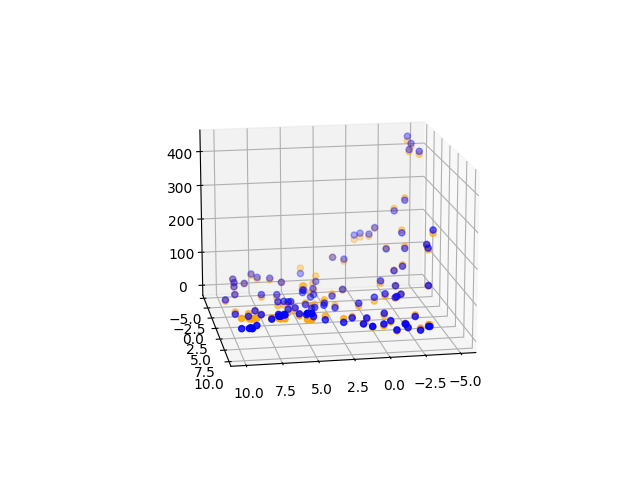

In [37]:

test_output = model_HF(dataset_HF['test_input'])*(dataset_HF['max_label']-dataset_HF['min_label'])+dataset_HF['min_label']
true_output=f_H(dataset_HF['test_input_true'].cpu().detach())

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(dataset_HF['test_input_true'].cpu().detach().numpy()[:, 0], dataset_HF['test_input_true'].cpu().detach().numpy()[:, 1], test_output.cpu().detach().numpy(), color='orange')
ax.scatter(dataset_HF['test_input_true'].cpu().detach().numpy()[:, 0], dataset_HF['test_input_true'].cpu().detach().numpy()[:, 1], true_output, color='blue')
ax.view_init(elev=15,    # 仰角
             azim=80   # 方位角
            )
plt.show()

In [38]:
from math import sqrt
def NRMSE(y, ytest, r_num):
    nrmse = []
    for i in range(r_num):
        sum_1 = np.sum(np.power(y[:,i] - ytest[:,i], 2))
        sum_2 = np.sum(np.power(ytest[:,i], 2))
        nrmse.append(sqrt(sum_1 / sum_2))
    #print('nrmse='+str(nrmse))
    NRMSE = np.mean(nrmse)
    return NRMSE

In [39]:
nrmse = NRMSE(test_output.cpu().detach().numpy(),true_output.numpy(),1)
nrmse

0.0854487528107065